In [1]:
import pandas as pd
import glob
from read_csv_gz import read_csv_gz
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
ed_diagnosis_df = read_csv_gz("ed_data/diagnosis.csv.gz")
ed_edstays_df = read_csv_gz("ed_data/edstays.csv.gz")
ed_medrecon_df = read_csv_gz("ed_data/medrecon.csv.gz")
ed_pyxis_df = read_csv_gz("ed_data/pyxis.csv.gz")
ed_triage_df = read_csv_gz("ed_data/triage.csv.gz")
ed_vitalsign_df = read_csv_gz("ed_data/vitalsign.csv.gz")

In [45]:
ed_triage_df[ed_triage_df['acuity'] > 4].head(10)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
150,10002769,33927820,97.8,96.0,16.0,100.0,156.0,106.0,0,5.0,PRESCRIPTION REFILL
573,10012438,30494808,97.8,72.0,18.0,96.0,123.0,87.0,7,5.0,BEE STING
1271,10027100,33115003,99.1,76.0,18.0,99.0,157.0,92.0,0,5.0,Med refill
1294,10027100,35957815,98.5,73.0,16.0,96.0,118.0,89.0,7,5.0,Med refill
1433,10029874,38908026,97.9,65.0,16.0,94.0,114.0,61.0,0,5.0,FOLEY CATH EVAL
2118,10046562,39937204,98.0,91.0,20.0,100.0,122.0,68.0,0,5.0,Suture removal
2461,10054858,36692260,98.4,68.0,12.0,98.0,87.0,57.0,0,5.0,Staples removal
2664,10061105,37557199,97.6,73.0,16.0,98.0,106.0,62.0,3,5.0,SPLINTER
3452,10083476,31737961,98.0,90.0,15.0,100.0,135.0,79.0,1,5.0,L Thumb injury
3532,10086404,36802223,99.2,72.0,16.0,98.0,145.0,94.0,0,5.0,?BUG BITES


In [62]:
# ed_triage_df['chiefcomplaint'].value_counts().head(50)
ed_triage_df['chiefcomplaint'].value_counts().iloc[:10000].sum()

np.int64(368920)

In [53]:
import pandas as pd

# Example Series
s = pd.Series([3, 1, 2, 2, 3, 3, 4, 1, 2])

# Sort by frequency of values
sorted_s = s.value_counts().loc[s].reset_index(drop=True)

print(sorted_s)

0    3
1    2
2    3
3    3
4    3
5    3
6    1
7    2
8    3
Name: count, dtype: int64


In [25]:
hosp_admissions_df = read_csv_gz("hosp_data/admissions.csv.gz")
hosp_patients_df = read_csv_gz("hosp_data/patients.csv.gz")

In [5]:
ed_edstays_df.head(5)

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [35]:
hosp_patients_info_df = hosp_admissions_df[['subject_id','insurance', 'marital_status', 'language']].drop_duplicates()
# hosp_patients_info_df = pd.merge(hosp_patients_info_df, hosp_patients_df[['subject'
hosp_patients_info_df.head()

,subject_id,insurance,marital_status,language
0,10000032,Medicaid,WIDOWED,English
4,10000068,NaN,SINGLE,English
5,10000084,Medicare,MARRIED,English
7,10000108,NaN,SINGLE,English
8,10000117,Medicaid,DIVORCED,English


In [32]:
hosp_patients_df.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13


In [36]:
ed_diagnosis_df['chief_complaint'].head()

KeyError: 'chief_complaint'

In [6]:
ed_edstays_df["hadm_id"].isna().sum() / ed_edstays_df.shape[0]

np.float64(0.5224130589738101)

In [7]:
ed_edstays_df.describe(include='all') 

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
count,4.250870e+05,2.030160e+05,4.250870e+05,425087,425087,425087,425087,425087,425087
unique,NaN,NaN,NaN,422817,423227,2,33,5,8
top,NaN,NaN,NaN,2173-05-28 00:17:00,2173-05-28 06:08:00,F,WHITE,WALK IN,HOME
freq,NaN,NaN,NaN,4,5,229898,228123,251849,241632
mean,1.500871e+07,2.499495e+07,3.499735e+07,NaN,NaN,NaN,NaN,NaN,NaN
std,2.878486e+06,2.888745e+06,2.888342e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000003e+07,2.000002e+07,3.000001e+07,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.251789e+07,2.248982e+07,3.249799e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.501628e+07,2.499935e+07,3.499395e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.749900e+07,2.749388e+07,3.750387e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ed_edstays_df['race'].unique()

array(['WHITE', 'ASIAN', 'OTHER', 'ASIAN - SOUTH EAST ASIAN', 'UNKNOWN',
       'BLACK/AFRICAN AMERICAN', 'ASIAN - CHINESE', 'WHITE - RUSSIAN',
       'BLACK/CAPE VERDEAN', 'PORTUGUESE', 'MULTIPLE RACE/ETHNICITY',
       'UNABLE TO OBTAIN', 'WHITE - OTHER EUROPEAN',
       'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - SALVADORAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'WHITE - BRAZILIAN',
       'HISPANIC/LATINO - GUATEMALAN', 'BLACK/CARIBBEAN ISLAND',
       'HISPANIC OR LATINO', 'BLACK/AFRICAN',
       'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN - KOREAN',
       'WHITE - EASTERN EUROPEAN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'HISPANIC/LATINO - MEXICAN', 'PATIENT DECLINED TO ANSWER',
       'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - COLUMBIAN',
       'ASIAN - ASIAN INDIAN', 'SOUTH AMERICAN',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - CENTRAL AMERICAN'],
      dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'WHITE'),
  Text(1, 0, 'ASIAN'),
  Text(2, 0, 'OTHER'),
  Text(3, 0, 'ASIAN - SOUTH EAST ASIAN'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'BLACK/AFRICAN AMERICAN'),
  Text(6, 0, 'ASIAN - CHINESE'),
  Text(7, 0, 'WHITE - RUSSIAN'),
  Text(8, 0, 'BLACK/CAPE VERDEAN'),
  Text(9, 0, 'PORTUGUESE'),
  Text(10, 0, 'MULTIPLE RACE/ETHNICITY'),
  Text(11, 0, 'UNABLE TO OBTAIN'),
  Text(12, 0, 'WHITE - OTHER EUROPEAN'),
  Text(13, 0, 'HISPANIC/LATINO - DOMINICAN'),
  Text(14, 0, 'HISPANIC/LATINO - SALVADORAN'),
  Text(15, 0, 'HISPANIC/LATINO - PUERTO RICAN'),
  Text(16, 0, 'WHITE - BRAZILIAN'),
  Text(17, 0, 'HISPANIC/LATINO - GUATEMALAN'),
  Text(18, 0, 'BLACK/CARIBBEAN ISLAND'),
  Text(19, 0, 'HISPANIC OR LATINO'),
  Text(20, 0, 'BLACK/AFRICAN'),
  Text(21, 0, 'AMERICAN INDIAN/ALASKA NATIVE'),
  Te

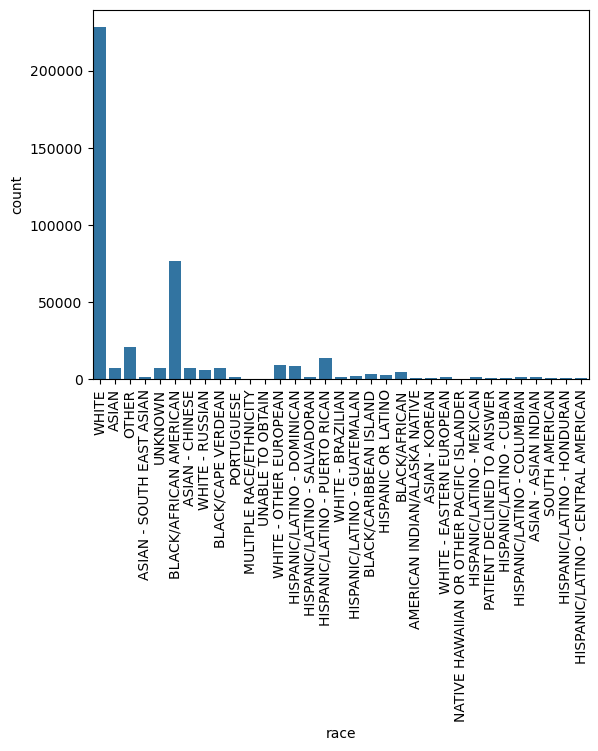

In [9]:
sns.countplot(x='race', data=ed_edstays_df)
plt.xticks(rotation=90)

In [10]:
ed_edstays_df["intime_converted"] = pd.to_datetime(ed_edstays_df["intime"])
print(ed_edstays_df['intime_converted'].isna().sum())

0


In [11]:
ed_edstays_df["outtime_converted"] = pd.to_datetime(ed_edstays_df["outtime"])
print(ed_edstays_df['outtime_converted'].isna().sum())

0


In [12]:
ed_edstays_df["duration"] = (ed_edstays_df["outtime_converted"] - ed_edstays_df["intime_converted"]).dt.total_seconds() / 60

In [13]:
ed_edstays_df["duration"].head(5)

0    253.0
1    337.0
2    286.0
3    810.0
4    486.0
Name: duration, dtype: float64

In [14]:
ed_edstays_df["duration"].describe()

count    425087.000000
mean        429.499604
std         397.679997
min       -1364.000000
25%         212.000000
50%         328.000000
75%         499.000000
max       29584.166667
Name: duration, dtype: float64

In [15]:
ed_edstays_df.iloc[ed_edstays_df["duration"].argmin()]

subject_id                          10086893
hadm_id                                  NaN
stay_id                             34581389
intime                   2116-09-30 23:09:00
outtime                  2116-09-30 00:25:00
gender                                     F
race                  BLACK/AFRICAN AMERICAN
arrival_transport                    UNKNOWN
disposition          LEFT WITHOUT BEING SEEN
intime_converted         2116-09-30 23:09:00
outtime_converted        2116-09-30 00:25:00
duration                             -1364.0
Name: 3547, dtype: object

In [16]:
ed_edstays_df[ed_edstays_df["duration"] < 0].shape[0]

6

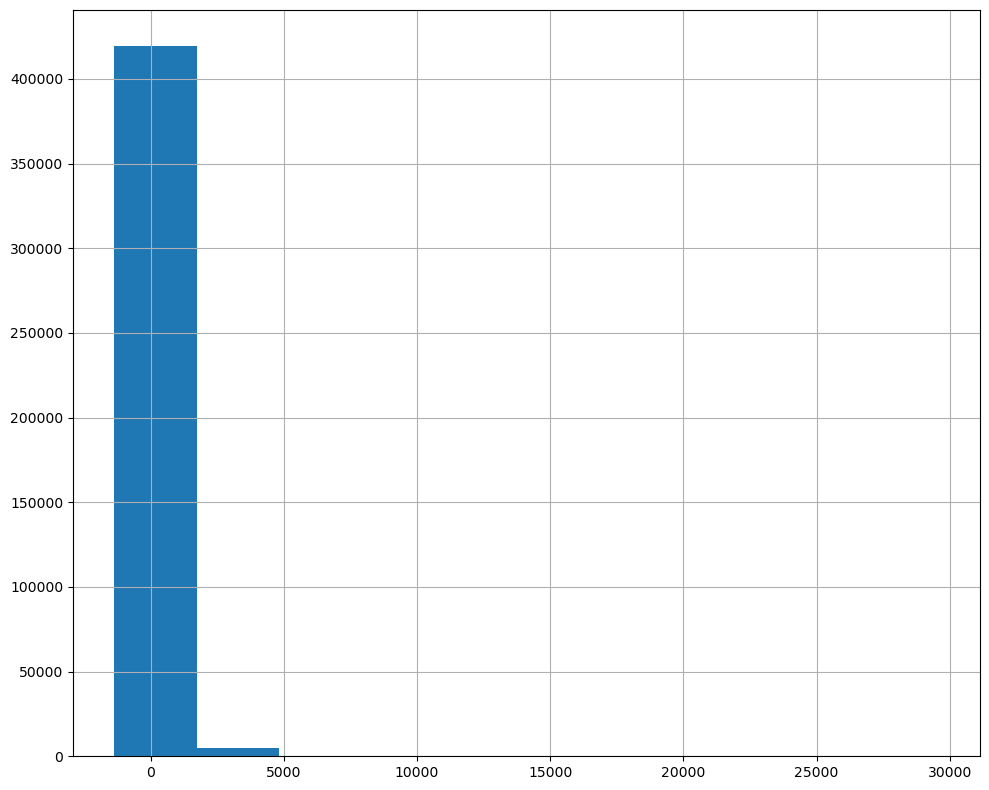

In [17]:
ed_edstays_df["duration"].hist(figsize=(10, 8), bins=10)
plt.tight_layout()

In [18]:
ed_edstays_df[ed_edstays_df["duration"] <= 2000].shape[0] / ed_edstays_df.shape[0]

0.9925709325385157

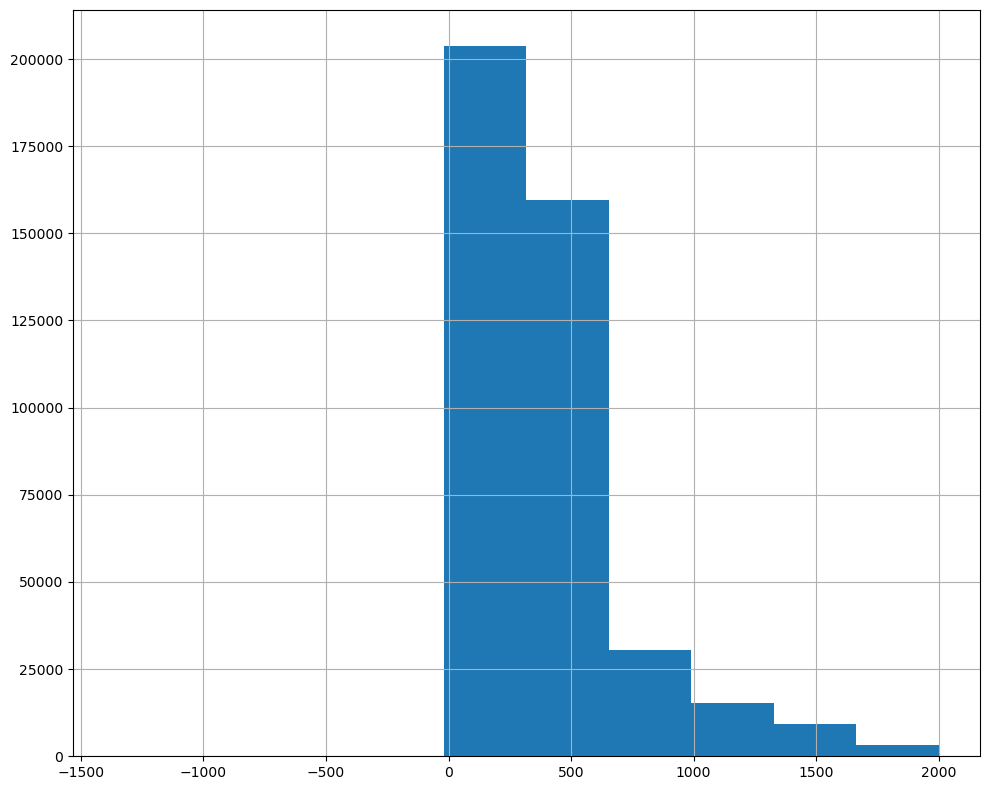

In [19]:
ed_edstays_df[ed_edstays_df["duration"] <= 2000]["duration"].hist(figsize=(10, 8), bins=10)
plt.tight_layout()

In [20]:
ed_triage_df.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity
count,4.250870e+05,4.250870e+05,401672.000000,407997.000000,404734.000000,404491.000000,406796.000000,405996.000000,418100.000000
mean,1.500871e+07,3.499735e+07,98.015046,85.079891,17.565521,98.471888,135.395352,81.262126,2.625102
std,2.878486e+06,2.888342e+06,4.008575,18.041690,5.485706,17.040807,240.956408,1057.220031,0.708084
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.251789e+07,3.249799e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000
50%,1.501628e+07,3.499395e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000
75%,1.749900e+07,3.750387e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,1820.000000,9322.000000,151103.000000,661672.000000,5.000000
